In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use("dark_background")

import sys
import os
import bungee
import cenote
import yaml
import pint

cenote.UREG.setup_matplotlib()

PATH = os.path.join(os.environ["SRC_DIR"], "examples", "115ft_30min.yaml")

plan = cenote.get_plan(PATH)
result = cenote.get_result(plan)

In [2]:
type(result.time)

pint.quantity.build_quantity_class.<locals>.Quantity

<IPython.core.display.Javascript object>


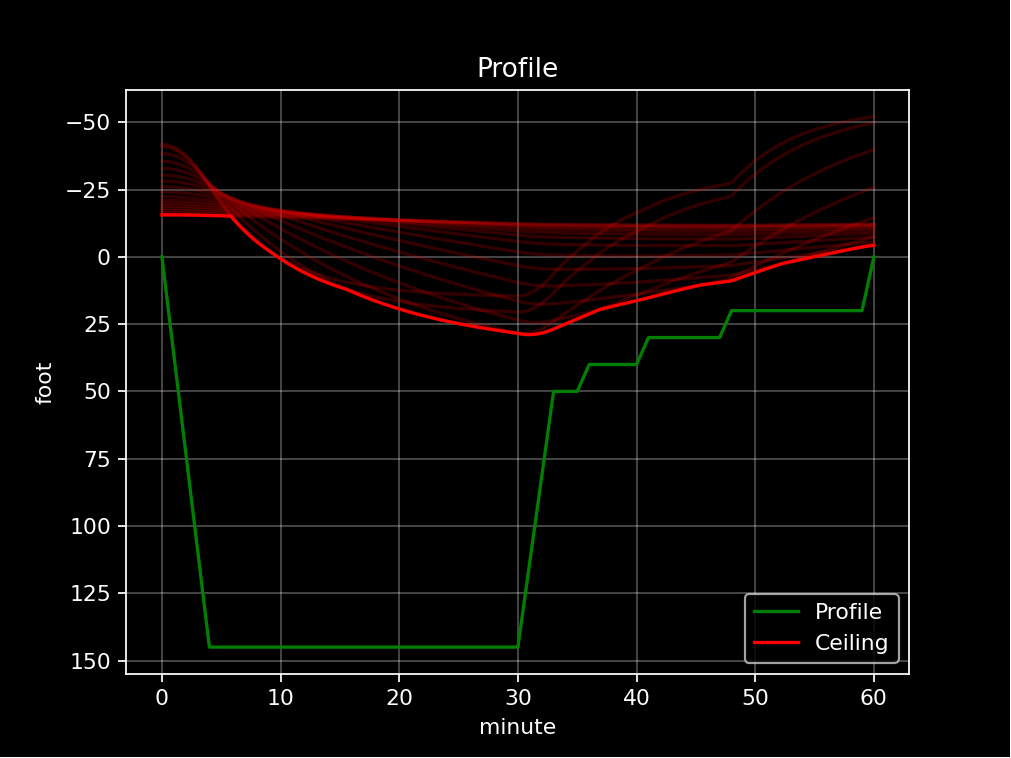

Text(0.5, 1.0, 'Profile')

In [3]:

# Depth
plt.figure()
plt.plot(result.time, result.depth, "g", label="Profile")
plt.plot(result.time, result.deco.ceiling, "r", label="Ceiling")
plt.legend(loc="best")
for i in range(result.deco.ceilings.shape[0]):
    plt.plot(result.time, result.deco.ceilings[i, :], "r", alpha=0.2)
plt.gca().invert_yaxis()
plt.grid(alpha=0.3)
plt.title("Profile")

<IPython.core.display.Javascript object>


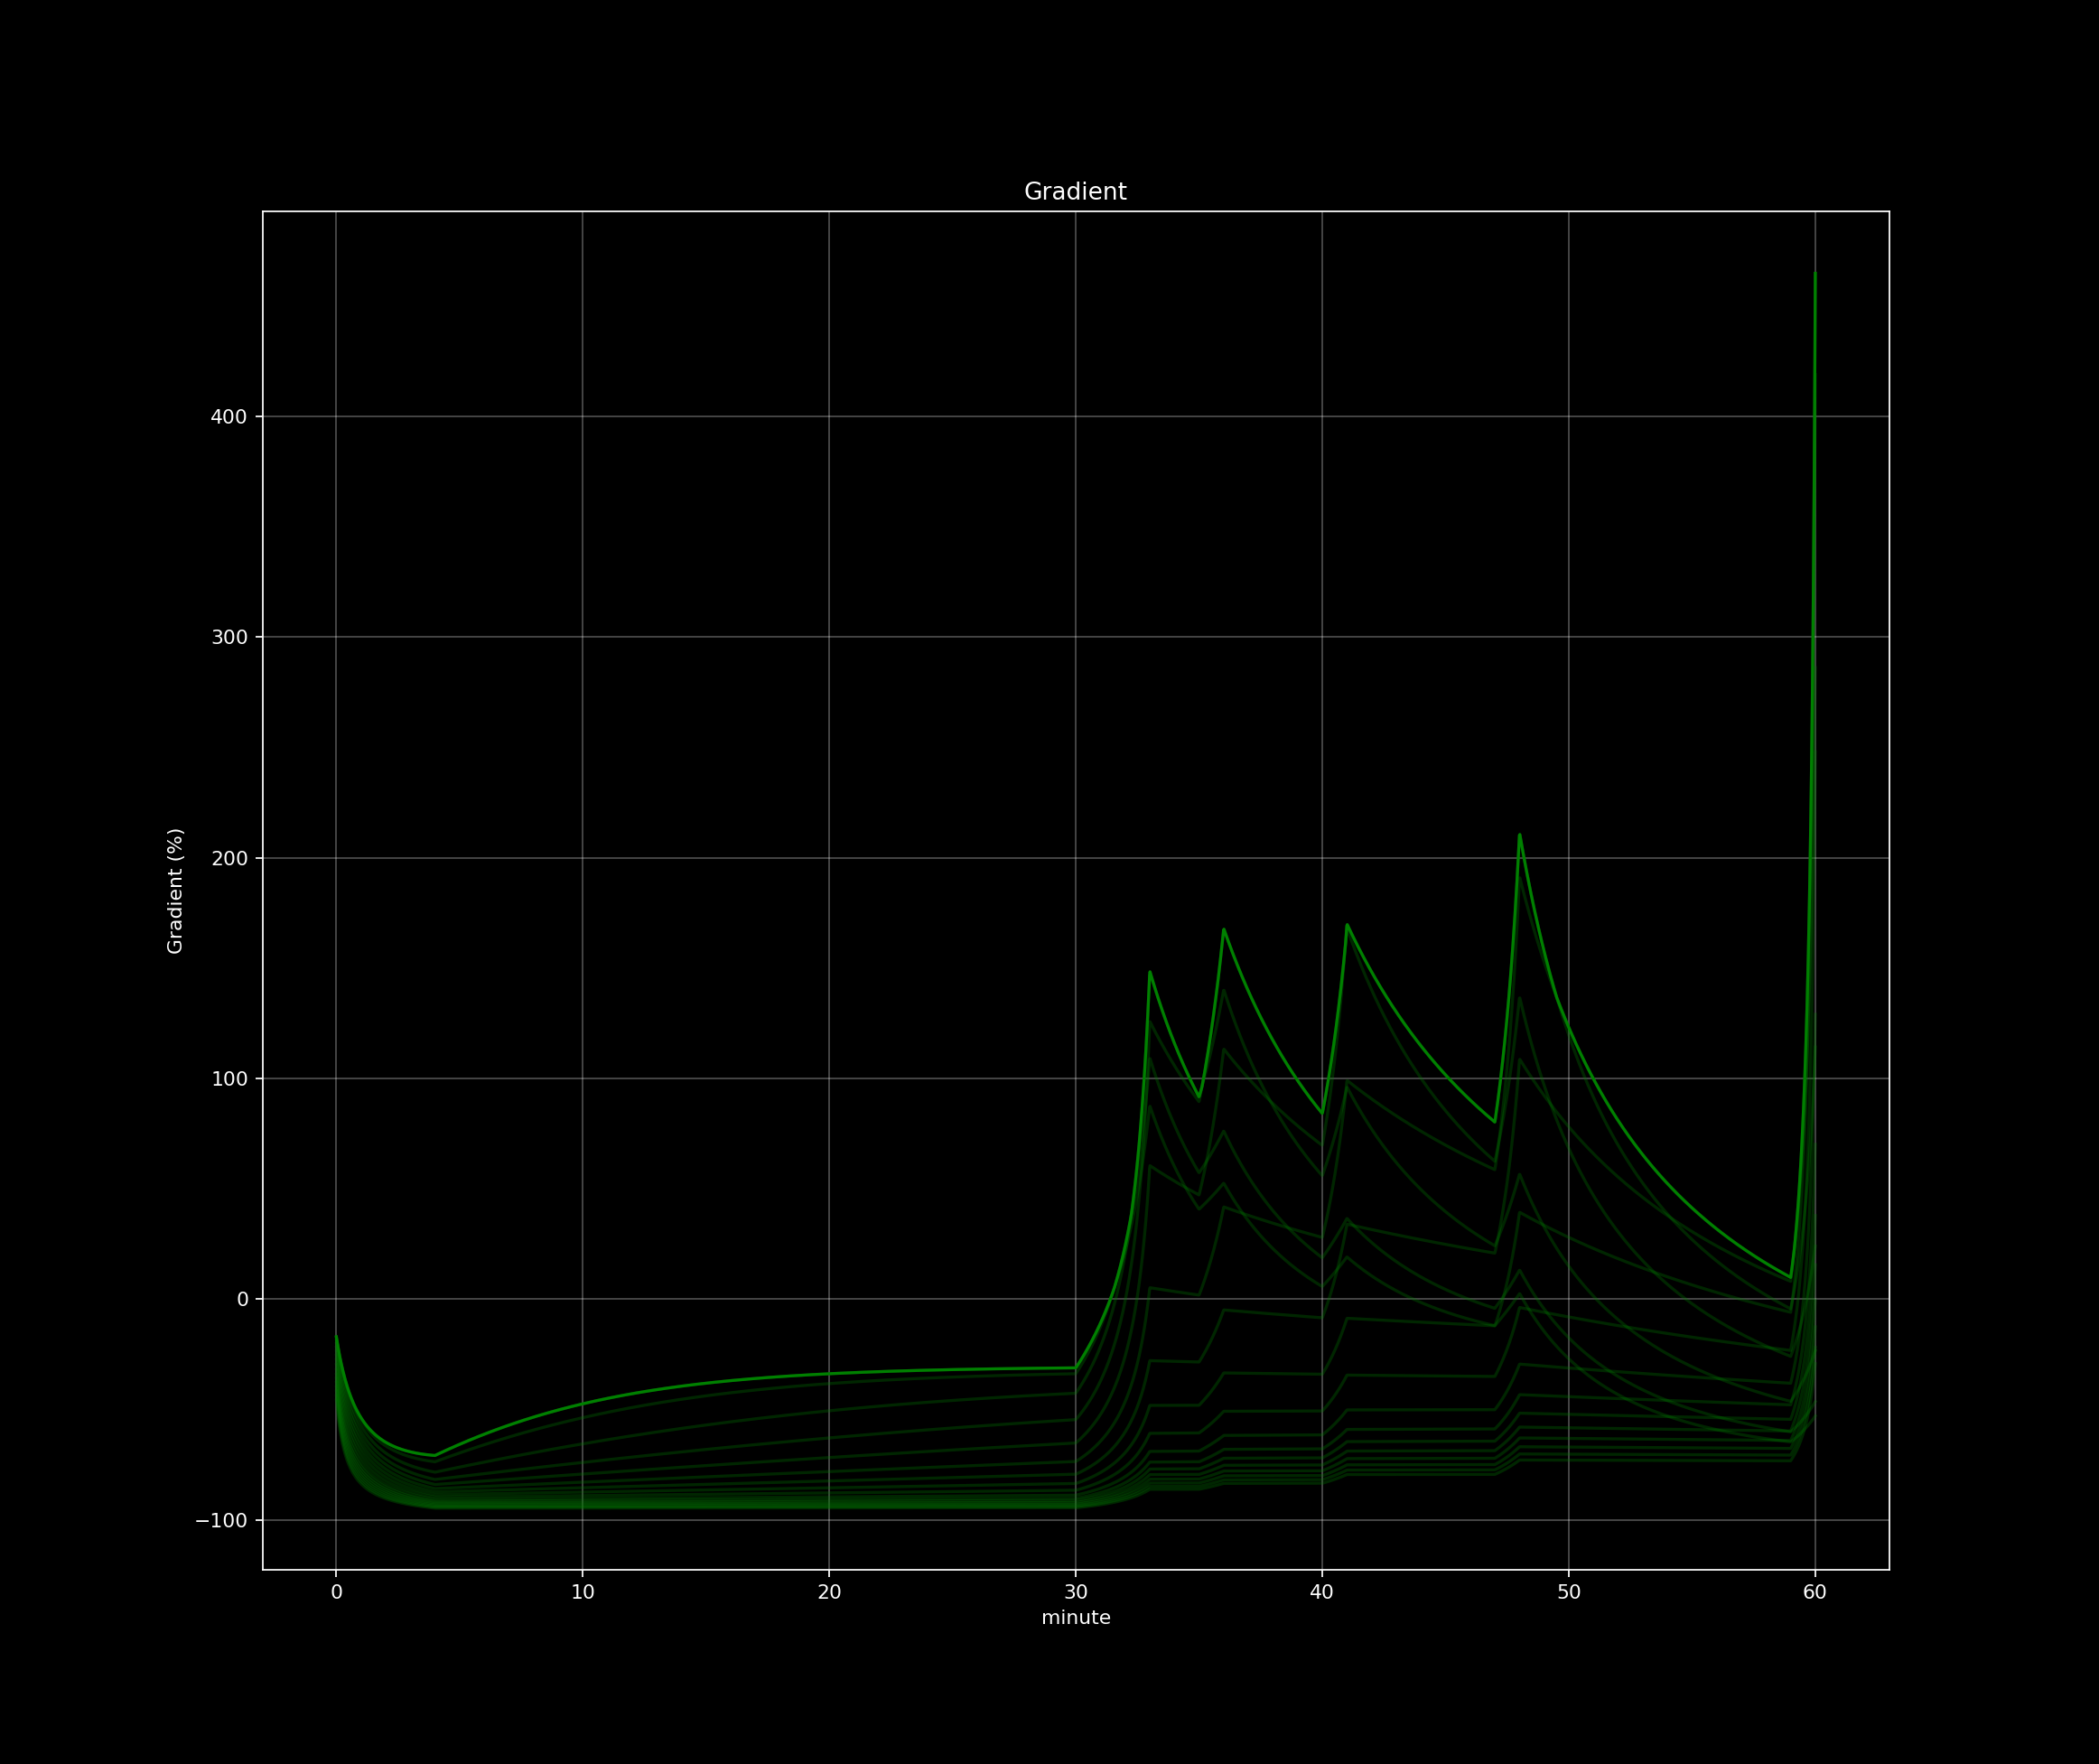

Text(0.5, 1.0, 'Gradient')

In [4]:
plt.figure()
plt.plot(result.time, result.deco.gradient * 100, "g")
for i in range(result.deco.gradients.shape[0]):
    plt.plot(result.time, result.deco.gradients[i, :] * 100, "g", alpha=0.3)
plt.grid(alpha=0.3)
plt.ylabel("Gradient (%)")
plt.title("Gradient")

<IPython.core.display.Javascript object>


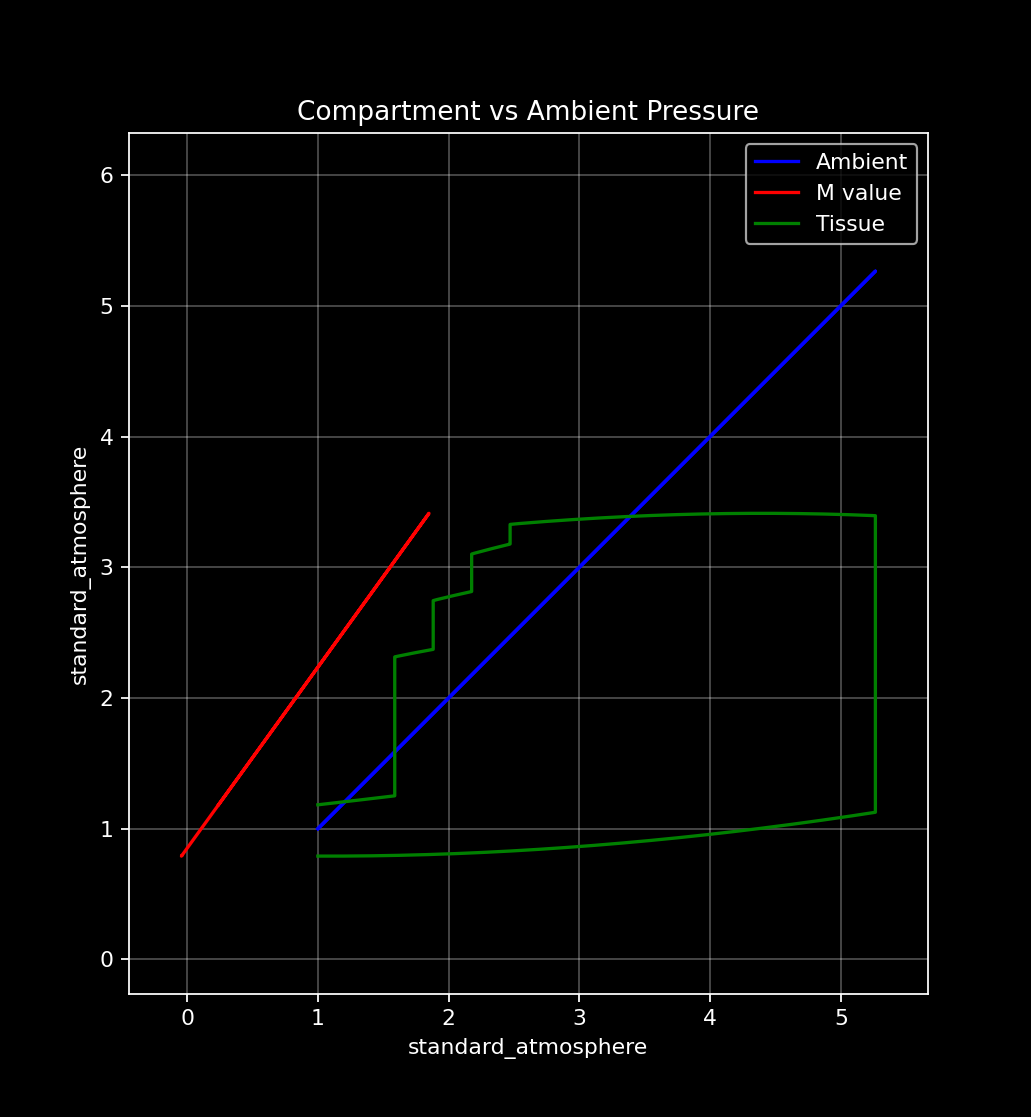

Text(0.5, 1.0, 'Compartment vs Ambient Pressure')

In [5]:
COMPARTMENT = 3

# ambient_pressure = [cenote.pressure_from_depth(d, plan.water()) for d in result.depth]
plt.figure()
plt.plot(result.ambient_pressure, result.ambient_pressure, "b", label="Ambient")
plt.plot(result.deco.M0s[COMPARTMENT, :], result.deco.tissue_pressures[COMPARTMENT, :], "r", label="M value")
plt.plot(result.ambient_pressure, result.deco.tissue_pressures[COMPARTMENT, :], "g", label="Tissue")
plt.legend(loc="best")
plt.axis("equal")
plt.grid(alpha=0.3)
plt.title("Compartment vs Ambient Pressure")


<IPython.core.display.Javascript object>


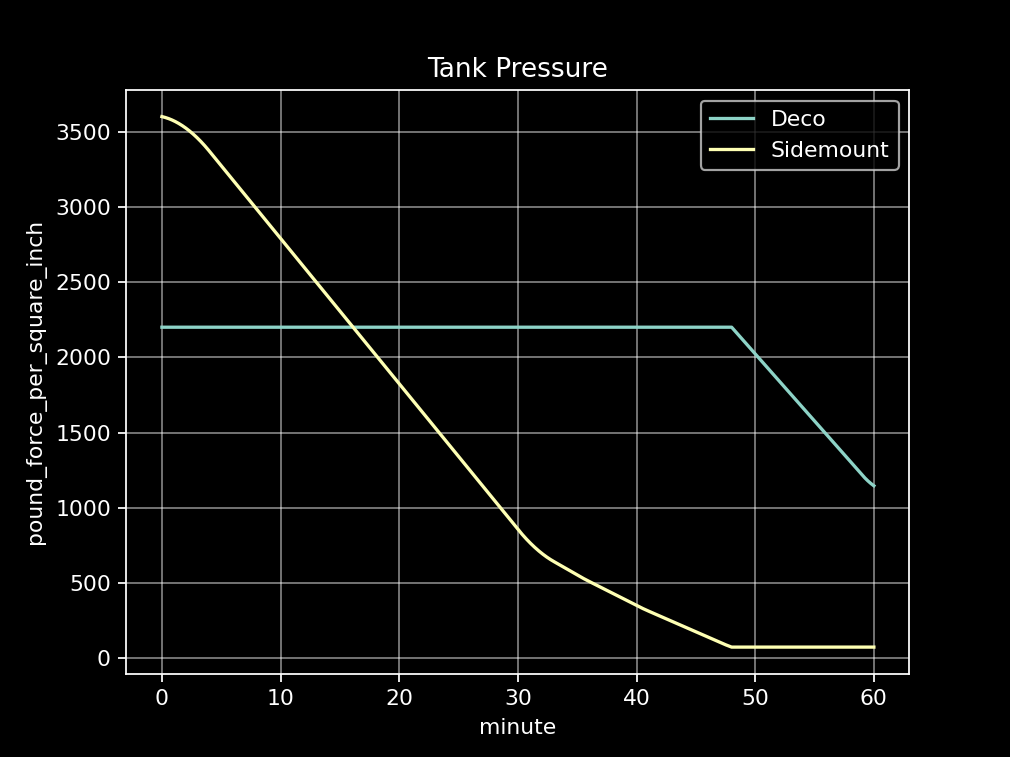

In [6]:
# Pressure
plt.figure()
for tank in result.tank_pressure:
    plt.plot(result.time, result.tank_pressure[tank], label=tank)
plt.grid(alpha=0.5)
plt.title("Tank Pressure")
plt.legend(loc="best")